### <strong>Milestone 2 - Phase 1<strong>

---

By [Anita Antono](https://github.com/AnitaAntono)


<strong>Anita Antono<strong>

<strong>Batch 009<strong>

### <strong>Dashboard<strong>
---

Kindly check my Deployment Project here :


[![Deploy to Heroku](https://www.herokucdn.com/deploy/button.svg)](https://anita-009.herokuapp.com/)

### <strong>Assignment Objectives<strong>

---

Milestones 2 was created to evaluation Phase 1 learning materials;

- Students capable to understand the concept of supervised learning and unsupervised learning
- Students capable to prepare data for use in supervised learning and unsupervised learning models
- Students capable to implement supervised learning and unsupervised learning with new datasets
- Students capable to do model evaluation
- Students capable to do model tuning
- Students capable to do deployment models

### <strong>Data Understanding<strong>

##### Bagian ini berisi penjelasan isi dataset yang saya gunakan untuk project ini.
---

<h3>Well, first i will explain about the dataset that i used.</h3>


<h2>I'm using the 'Gender Classification' dataset for my Milestone 2 project</h2>

![BANK](https://miro.medium.com/max/1200/1*49F7HMKFmilsbRydVc9Blw.png)

Dataset lengkap dapat dilihat pada website ini <a href='https://www.kaggle.com/datasets/elakiricoder/gender-classification-dataset'>Kaggle</a>


<ins>Context<ins>
* While I was practicing machine learning, I wanted to create a simple dataset that is closely aligned to the real world scenario and gives better results to whet my appetite on this domain. If you are a beginner who wants to try solving classification problems in machine learning and if you prefer achieving better results, try using this dataset in your projects which will be a great place to start.

<ins>Content<ins>
* This dataset contains 7 features and a label column.

<ins>Column Information<ins>

- longhair - This column contains 0's and 1's where 1 is "long hair" and 0 is "not long hair".
- foreheadwidthcm - This column is in CM's. This is the width of the forehead.
- foreheadheightcm - This is the height of the forehead and it's in Cm's.
- nosewide - This column contains 0's and 1's where 1 is "wide nose" and 0 is "not wide nose".
- noselong - This column contains 0's and 1's where 1 is "Long nose" and 0 is "not long nose".
- lipsthin - This column contains 0's and 1's where 1 represents the "thin lips" while 0 is "Not thin lips".
- distancenosetoliplong - This column contains 0's and 1's where 1 represents the "long distance between nose and lips" while 0 is "short distance between nose and lips".

<ins>Target<ins>

-gender - This is either "Male" or "Female".

<ins>Acknowledgements<ins>

Nothing to acknowledge as this is just a made up data.

<ins>Inspiration<ins>

It's painful to see bad results at the beginning. Don't begin with complicated datasets if you are a beginner. I'm sure that this dataset will encourage you to proceed further in the domain. Good luck.


### <strong>Import Libraries<strong>

#### This section contains all the libraries that i used in the project.
---

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
from scipy import stats
import seaborn as sns

import warnings
warnings.filterwarnings("ignore") 

from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from feature_engine.outliers import Winsorizer

# Library for models
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB # Naive Bayes

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer 
import pickle


### <strong>Data Loading<strong>

##### This section contains data preparation before the next step which is data exploration.
---

<h2>First, i load the data!</h2>

In [8]:
data = pd.read_csv('gender_classification.csv')

In [9]:
df = data.copy()
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


### <strong>Exploratory Data Analysis / EDA<strong>

##### This section contains data exploration on the dataset.
---


<h3>Below this we can see information about 7 columns in the dataset. 2 types of float, 5 types of integer, and 1 object.</h3>

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


* <strong>This step is for cheking data from descriptive statistics<strong>

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
long_hair,5001.0,0.869626,0.336748,0.0,1.0,1.0,1.0,1.0
forehead_width_cm,5001.0,13.181484,1.107128,11.4,12.2,13.1,14.0,15.5
forehead_height_cm,5001.0,5.946311,0.541268,5.1,5.5,5.9,6.4,7.1
nose_wide,5001.0,0.493901,0.500013,0.0,0.0,0.0,1.0,1.0
nose_long,5001.0,0.507898,0.499988,0.0,0.0,1.0,1.0,1.0
lips_thin,5001.0,0.493101,0.500002,0.0,0.0,0.0,1.0,1.0
distance_nose_to_lip_long,5001.0,0.498900,0.500049,0.0,0.0,0.0,1.0,1.0


* <strong>This step is for checking if there has missing values or not in the dataset<strong>

In [12]:
print("Total missing value on the dataset  :" , df.isnull().sum().sum())

pd.DataFrame({'missing value' : df.isnull().sum()})

Total missing value on the dataset  : 0


,missing value
long_hair,0
forehead_width_cm,0
forehead_height_cm,0
nose_wide,0
nose_long,0
lips_thin,0
distance_nose_to_lip_long,0
gender,0


**<H3>Next, let me show you a lil bit about data visualization</H3>**

* <strong>Data Visualization<strong>

Text(0.5, 1.0, 'Correlation Matrix')

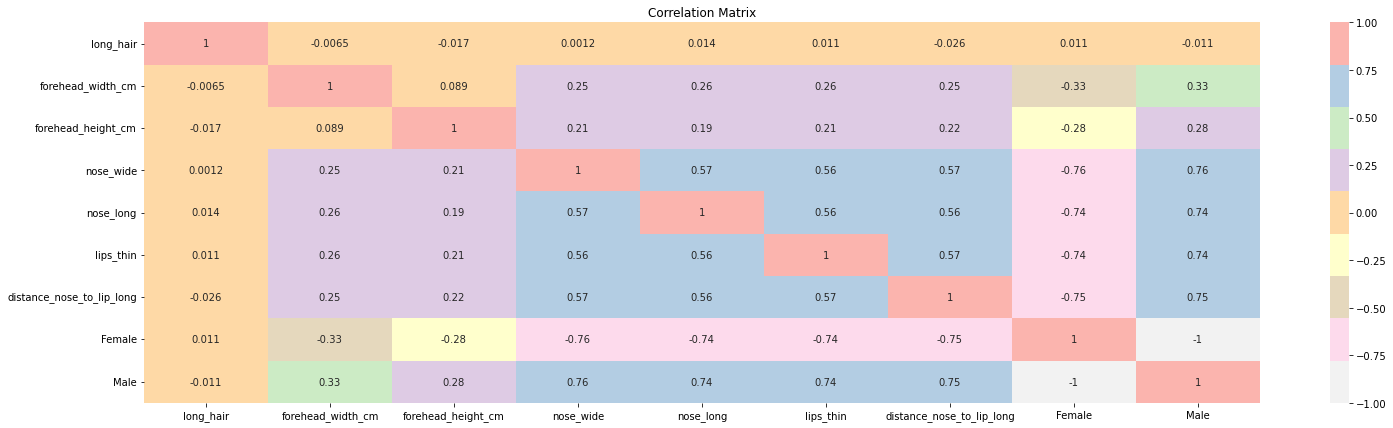

In [13]:
plt.figure(figsize=(25, 7))
sns.heatmap(pd.concat([df, pd.get_dummies(df.gender)], axis=1).corr(), annot=True, cmap='Pastel1_r')
plt.title('Correlation Matrix')

*Note: Dari Correlation Matrix diatas saya ingin membuat beberapa data visualization berdasarkan feature yang berhubungan dengan target 'gender'. 

In [14]:
colors1 = sns.color_palette("Blues")
colors2 = sns.color_palette("pink")
sns.set_style("whitegrid")

* <strong>What's gender in the data?<strong>

In [15]:
df['gender'].value_counts()

Female    2501
Male      2500
Name: gender, dtype: int64

<h3>Only two genders category in the data, it's **MALE** and **FEMALE**</h3>

In [16]:
# kolom diagnosis

male = df[(df['gender'] != 0)] 
female = df[(df['gender'] == 0)]

* <strong>Frequency 'MALE' and 'FEMALE' by Gender<strong>

In [17]:
#membuat visualisasi Pie Chart

trace = go.Pie(labels = ['male','female'],
               values = df['gender'].value_counts(),
               textfont=dict(size=15), opacity = 0.8,
               marker=dict(colors=[ 'skyblue', 'pink'], line=dict(color='#000000', width=1.5)))


layout = dict(title = 'Percentage of Male and Female')
           
fig = dict(data = [trace], layout=layout)
py.iplot(fig) 


<h3> We can see that the gender frequency between 'Male' and 'Female' almost balanced. 

male **2500** (twenty five hundred) and female **2501** (two thousand five hundred one)</h3>

*Note: 50% pada data, atau 2500 adalah ber jenis kelamin wanita. dan 50% lagi adalah ber jenis kelamin pria, 2501 orang.

* <strong>Frequency of gender by long hair<strong>

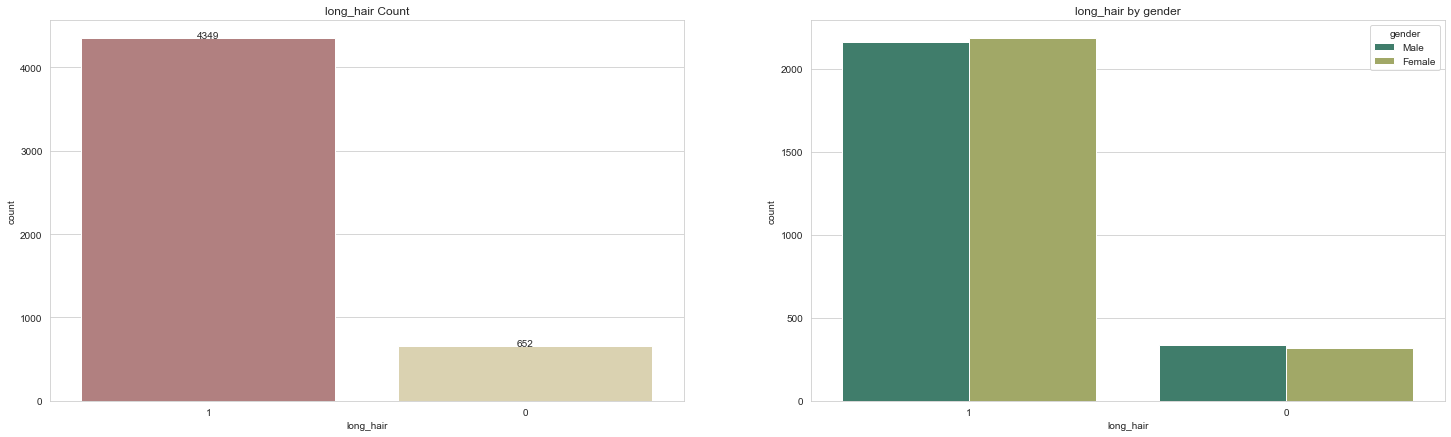

In [18]:
plt.figure(figsize=(25, 7))
plt.subplot(1, 2, 1)
fig = sns.countplot(x='long_hair', data=df, order=df.long_hair.value_counts().index, palette='pink')
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width() / 2.,
             height + 3,
             '{:1.0f}'.format(height),
             ha="center")

plt.title('long_hair Count')
plt.xlabel('long_hair')

plt.subplot(1, 2, 2)
sns.countplot(x='long_hair', data=df, order=df.long_hair.value_counts().index, palette='gist_earth', hue='gender')
plt.title('long_hair by gender')
plt.xlabel('long_hair')

plt.show()

In [19]:
def plot_logical_col(df, col, no, yes):

    df = df.groupby('gender')[col].value_counts(normalize = True).unstack(col).rename(columns = {0: no, 1: yes}).reset_index()
    print(df)

plot_logical_col(df, 'long_hair', 'short_hair', 'long_hair')


long_hair  gender  short_hair  long_hair
0          Female    0.126749   0.873251
1            Male    0.134000   0.866000


<h3>Based on chart above frequency of gender by 'long_hair'. 

The dataset contains a description where 0 is 'short hair' and 1 is 'long hair'. 

The chart shows that 652 ( SIX HUNDRED FIFTY TWO ) people have a short hair and 
4349 (FOUR THOUSAND THREE HUNDRED FORTY NINE) people have a long hair.

If we look at frequency by gender, **'male'** also have long hair but **'female'** more dominant. 
I mean, female are the most have a long hair than male.</h3>

*Note: Jika kita lihat berdasarkan 'long_hair' atau panjang rambut, pada dataset tertulis keterangan dimana 0 adalah 'rambut pendek' dan 1 adalah 'rambut panjang'. pada chart di hasilkan 652 adalah orang dengan rambut pendek, dan 4349 adalah orang dengan rambut panjang. 

Kalau dilihat dari persentase berdasarkan gender, 'male' atau pria juga ternyata ada yang memiliki rambut panjang, namun wanita 'female' lebih dominan jika dilihat berdasarkan panjang rambut.

* <strong>Frequency of gender by nose wide<strong>

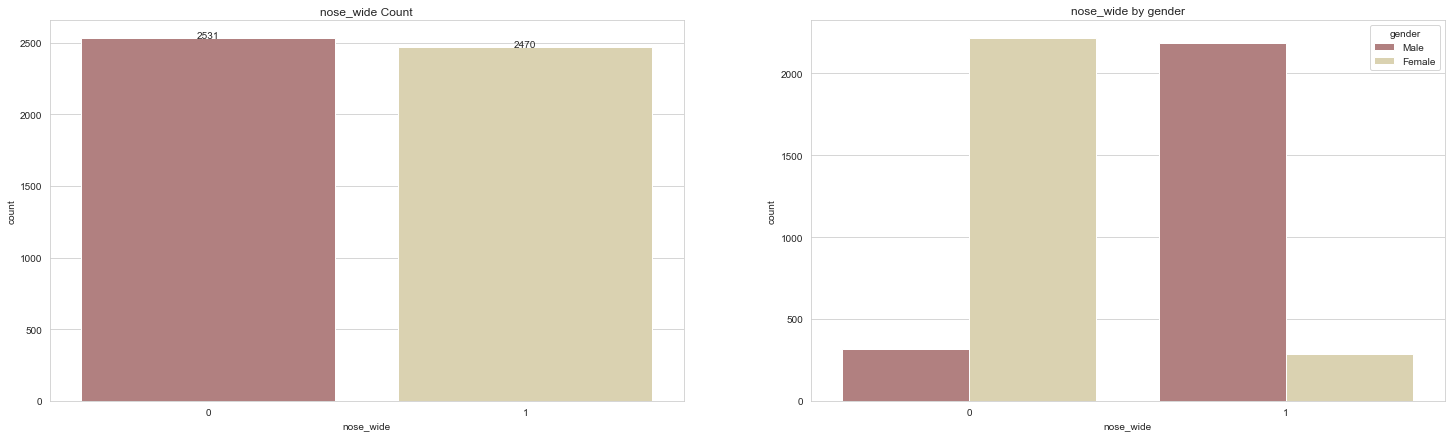

In [20]:
plt.figure(figsize=(25, 7))
plt.subplot(1, 2, 1)
fig = sns.countplot(x='nose_wide', data=df, order=df.nose_wide.value_counts().index, palette='pink')
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width() / 2.,
             height + 3,
             '{:1.0f}'.format(height),
             ha="center")

plt.title('nose_wide Count')
plt.xlabel('nose_wide')

plt.subplot(1, 2, 2)
sns.countplot(x='nose_wide', data=df, order=df.nose_wide.value_counts().index, palette='pink', hue='gender')
plt.title('nose_wide by gender')
plt.xlabel('nose_wide')

plt.show()

<h3>Based on chart above frequency of gender by 'nose_wide'.

The dataset contains a description where 0 is 'nose isn't wide' and 1 is 'wide nose'. 

from the physical characteristics of the nose shape, by looking at the width of the nose, the percentage of 'MALE' tends to be higher than 'FEMALE'.

On the chart above we can see that there have physical characteristics, **FEMALE** have narrow noses more than wide noses, but most of **MALE** have wide noses.</h3>

*Note: Jika kita lihat berdasarkan 'nose_wide' atau lebarnya hidung, pada dataset ditulis keterangan bahwa 0 adalah 'hidung tidak lebar' dan 1 adalah 'hidung lebar. pada chart bisa kita lihat ciri fisik 'hidung tidak lebar' lebih banyak daripada 'hidung lebar'.

Jika dilihat ciri fisik dari bentuk hidung, dengan melihat lebar hidung persentase dari pria cenderung lebih tinggi dibanding wanita.

* <strong>Frequency of gender by nose long<strong>

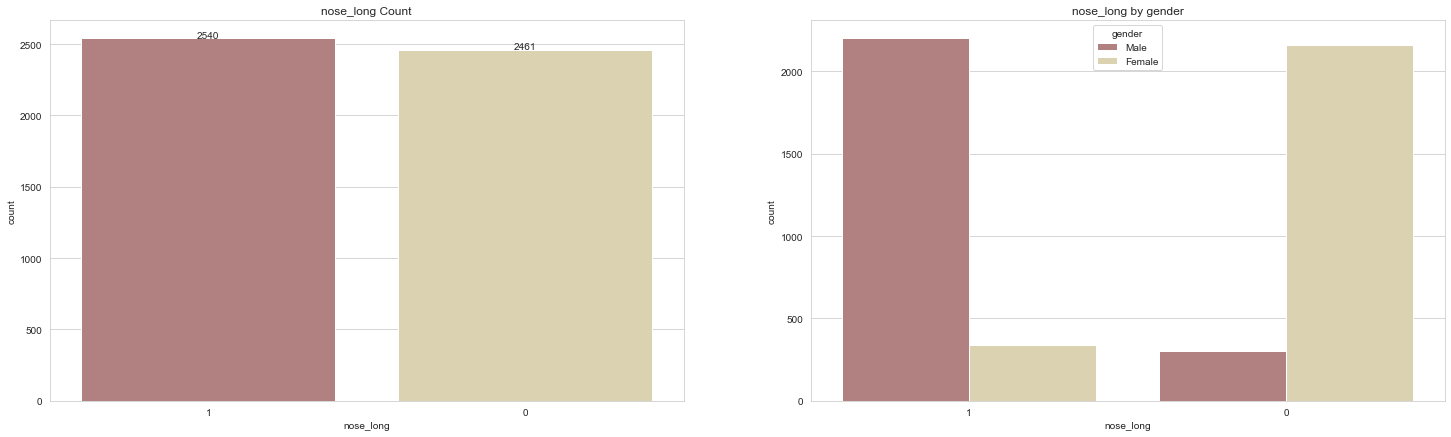

In [21]:
plt.figure(figsize=(25, 7))
plt.subplot(1, 2, 1)
fig = sns.countplot(x='nose_long', data=df, order=df.nose_long.value_counts().index, palette='pink')
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width() / 2.,
             height + 3,
             '{:1.0f}'.format(height),
             ha="center")

plt.title('nose_long Count')
plt.xlabel('nose_long')

plt.subplot(1, 2, 2)
sns.countplot(x='nose_long', data=df, order=df.nose_long.value_counts().index, palette='pink', hue='gender')
plt.title('nose_long by gender')
plt.xlabel('nose_long')

plt.show()

<h3>Based on chart above frequency of gender by 'nose_long'.

The dataset contains a description where 0 is 'nose isn't long' and 1 is 'long nose'. 

On the chart above we can see that there have physical characteristics, **Female** have short noses more than long noses, but most of **male** have long noses.

*Note: Jika kita lihat berdasarkan 'nose_long' atau panjang hidung, pada dataset ditulis keterangan bahwa 0 adalah 'hidung tidak panjang' dan 1 adalah 'hidung panjang'. pada chart bisa kita lihat ciri fisik 'hidung tidak panjang' lebih sedikit daripada 'hidung panjang'.

Jika dilihat dari ciri fisik, dengan mengukur panjang hidung persentase dari gender pria lebih tinggi dibandingkan dengan gender wanita 'female'.

* <strong>Frequency of gender by lips thin<strong>

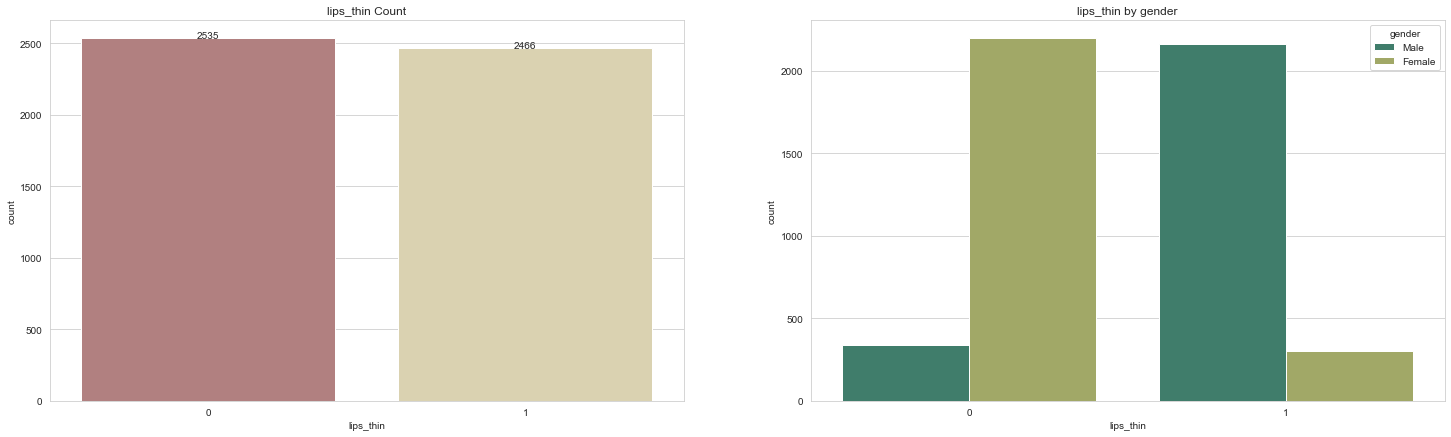

In [22]:
plt.figure(figsize=(25, 7))
plt.subplot(1, 2, 1)
fig = sns.countplot(x='lips_thin', data=df, order=df.lips_thin.value_counts().index, palette='pink')
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width() / 2.,
             height + 3,
             '{:1.0f}'.format(height),
             ha="center")

plt.title('lips_thin Count')
plt.xlabel('lips_thin')

plt.subplot(1, 2, 2)
sns.countplot(x='lips_thin', data=df, order=df.lips_thin.value_counts().index, palette='gist_earth', hue='gender')
plt.title('lips_thin by gender')
plt.xlabel('lips_thin')

plt.show()

<h3>Based on chart above frequency of gender by 'lips_thin'.

The dataset contains a description where 0 is 'not thin lips' and 1 is 'thin lips'. 

As we can see from chart above the physical characteristics of gender by the size of lips, most OF **FEMALE** have thin lips than **MALE**, most of male have thick lips.</h3>


*Note: Jika kita lihat berdasarkan 'lips_thin' atau bibir tipis, pada dataset ditulis keterangan bahwa 0 adalah 'bibir tidak tipis' dan 1 adalah 'bibir tipis'. pada chart bisa kita lihat ciri fisik 'lips_thin' lebih banyak daripada 'bibir tidak tipis'.

Jika dilihat dari ciri fisik berdasarkan bibir, bentuk tipis bibir tipis lebih banyak di miliki oleh yang ber jenis kelamin 'female' atau wanita. jika dibandingan dengan jenis kelamin pria.

* <strong>Frequency based on Forehead<strong>

In [23]:
width_bins = [11,12,13,14,15,16]
width_names = ['<= 12','<= 13','<= 14','<= 15', '<= 16']
df['width_limit'] = pd.cut(df['forehead_width_cm'], bins= width_bins, labels= width_names)


height_bins = [5,5.5,6,6.5,7,7.5]
height_names = ['<= 5.5','<= 6','<= 6.5','<= 7', '<= 7.5']
df['height_limit'] = pd.cut(df['forehead_height_cm'], bins= height_bins, labels= height_names)

df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender,width_limit,height_limit
0,1,11.8,6.1,1,0,1,1,Male,<= 12,<= 6.5
1,0,14.0,5.4,0,0,1,0,Female,<= 14,<= 5.5
2,0,11.8,6.3,1,1,1,1,Male,<= 12,<= 6.5
3,0,14.4,6.1,0,1,1,1,Male,<= 15,<= 6.5
4,1,13.5,5.9,0,0,0,0,Female,<= 14,<= 6
...,...,...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female,<= 14,<= 5.5
4997,1,11.9,5.4,0,0,0,0,Female,<= 12,<= 5.5
4998,1,12.9,5.7,0,0,0,0,Female,<= 13,<= 6
4999,1,13.2,6.2,0,0,0,0,Female,<= 14,<= 6.5


In [24]:
df['forehead_height_cm'].value_counts()

5.7    306
5.9    303
5.3    301
5.5    299
6.1    296
5.1    293
6.2    290
5.8    290
6.4    287
6.3    285
6.5    285
5.6    279
6.0    275
5.4    265
5.2    259
6.6    126
6.8    118
7.0    117
7.1    113
6.9    109
6.7    105
Name: forehead_height_cm, dtype: int64

In [25]:
df['forehead_width_cm'].value_counts()

12.0    168
11.8    161
14.1    155
14.0    154
11.5    154
11.6    152
11.9    150
13.3    149
14.2    149
12.2    145
12.6    145
12.1    145
13.2    143
14.3    143
12.9    141
12.5    141
13.7    140
12.8    138
12.3    138
13.6    138
13.0    137
13.4    137
13.5    136
13.8    134
11.7    133
13.1    131
13.9    131
12.7    130
12.4    127
11.4     84
14.9     79
14.5     72
15.2     71
15.5     66
15.1     65
15.4     64
15.3     64
14.4     63
14.6     61
15.0     60
14.7     59
14.8     48
Name: forehead_width_cm, dtype: int64

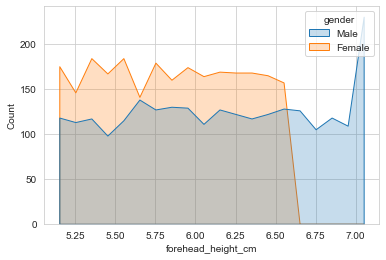

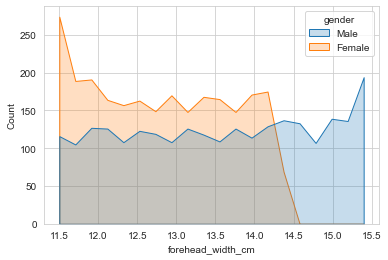

In [26]:
df_forehead = ['forehead_height_cm','forehead_width_cm']

for col in df_forehead:
    sns.histplot(data=df[[col,'gender']],x=col, hue='gender',element='poly')
    plt.show()

<h3>Based on chart above frequency of gender by 'FOREHEAD'.

'forehead width dataset' - This is description about forehead widht in Cm.
'forehead height' - This is description about forehead height in Cm.

If the forehead height more than 6.5 cm and the width of it more than 15 cm then the gender is absolutely **MALE**, otherwise the gender will be a **FEMALE** more than male</h3>

*Note: Keterangan pada dataset lebar dahi - Kolom ini ada di CM. Ini adalah lebar dahi.
tinggi dahi - Ini adalah tinggi dahi dan dalam Cm.

Jika kita lihat lebar dahi / 'forehead_width' ini dari 11cm sampai dengan 16 dan tinggi dahi / 'forehead_height' ini dari 5cm sampai dengan 7,5 cm. jika tinggi dahi lebih dari 6,5 cm dan lebarnya lebih dari 15 cm maka jenis kelamin mutlak laki-laki, sebaliknya jenis kelamin perempuan lebih banyak dari laki-laki

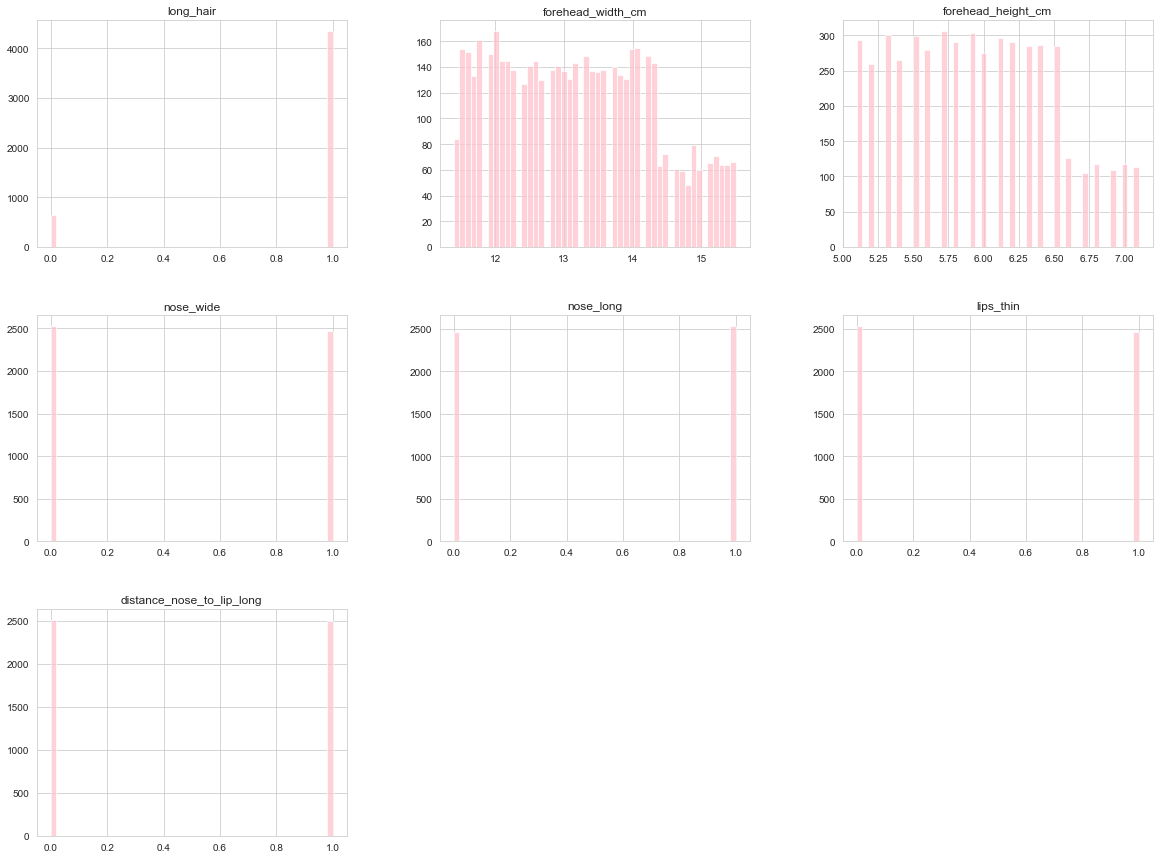

In [27]:
#histogram of all the features 

df.hist(bins=50, figsize=(20,15),color='pink',alpha=0.7)
plt.show()

<h3>Only'long_hair' column **skewed** distribution. while the other columns have a normal distribution.</h3>

*Note: Dari semua kolom, hanya kolom 'long_hair' yang distribusi data nya **skewed**. sedangkan kolom lain distribusi nya normal.

### <strong>Data Preprocessing<strong>

##### This section contains the process of preparing data for the model training process, such as dividing data transformation and other necessary processes.
---

##### Get Data Inference

In [28]:
# Get Data for Model Inference

df_inf = df.sample(10, random_state=25)
df_inf

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender,width_limit,height_limit
613,1,13.4,5.7,0,0,0,0,Female,<= 14,<= 6
2794,1,14.2,5.7,0,1,0,1,Female,<= 15,<= 6
4920,1,13.2,7.1,0,1,1,0,Male,<= 14,<= 7.5
2811,1,12.5,5.6,0,0,0,0,Female,<= 13,<= 6
3408,1,14.5,6.6,1,1,0,1,Male,<= 15,<= 7
527,1,14.3,5.3,0,0,0,1,Female,<= 15,<= 5.5
4799,1,12.5,6.2,0,0,0,0,Female,<= 13,<= 6.5
417,1,13.9,6.2,0,0,1,1,Female,<= 14,<= 6.5
717,1,14.7,7.0,0,0,1,1,Male,<= 15,<= 7
3756,1,13.7,6.9,1,1,1,1,Male,<= 14,<= 7


In [29]:
# process of separating inference data with train test data

data_train_test = df.drop(df_inf.index)
data_train_test

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender,width_limit,height_limit
0,1,11.8,6.1,1,0,1,1,Male,<= 12,<= 6.5
1,0,14.0,5.4,0,0,1,0,Female,<= 14,<= 5.5
2,0,11.8,6.3,1,1,1,1,Male,<= 12,<= 6.5
3,0,14.4,6.1,0,1,1,1,Male,<= 15,<= 6.5
4,1,13.5,5.9,0,0,0,0,Female,<= 14,<= 6
...,...,...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female,<= 14,<= 5.5
4997,1,11.9,5.4,0,0,0,0,Female,<= 12,<= 5.5
4998,1,12.9,5.7,0,0,0,0,Female,<= 13,<= 6
4999,1,13.2,6.2,0,0,0,0,Female,<= 14,<= 6.5


In [30]:
# Reset the index

data_train_test.reset_index(drop=True,inplace=True)
df_inf.reset_index(drop=True,inplace=True)

##### Spliting Data

In [31]:
# Hyper parameter used is 'gender'

X = data_train_test.drop(['gender'], axis=1)
y = data_train_test['gender']
X

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,width_limit,height_limit
0,1,11.8,6.1,1,0,1,1,<= 12,<= 6.5
1,0,14.0,5.4,0,0,1,0,<= 14,<= 5.5
2,0,11.8,6.3,1,1,1,1,<= 12,<= 6.5
3,0,14.4,6.1,0,1,1,1,<= 15,<= 6.5
4,1,13.5,5.9,0,0,0,0,<= 14,<= 6
...,...,...,...,...,...,...,...,...,...
4986,1,13.6,5.1,0,0,0,0,<= 14,<= 5.5
4987,1,11.9,5.4,0,0,0,0,<= 12,<= 5.5
4988,1,12.9,5.7,0,0,0,0,<= 13,<= 6
4989,1,13.2,6.2,0,0,0,0,<= 14,<= 6.5


In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= 0.20, random_state = 25)

print('X train:', X_train.shape)
print('X test:', X_test.shape)
print('y train:', y_train.shape)
print('y test:', y_test.shape)

X train: (3992, 9)
X test: (999, 9)
y train: (3992,)
y test: (999,)


In [33]:
num_columns = X_train.select_dtypes(include = np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include = ['object']).columns.tolist()


In [34]:
X_train_num =X_train[num_columns].copy()
y_train_num =y_train.copy()


In [35]:
X_train_num.reset_index(drop=True,inplace=True)
y_train_num.reset_index(drop=True,inplace=True)

In [36]:
train_set = pd.concat([X_train_num,y_train_num],axis=1)

train_set

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,14.6,5.1,1,1,1,1,Male
1,1,12.1,5.4,0,0,0,0,Female
2,1,13.4,5.4,1,0,0,0,Female
3,1,13.8,6.8,1,1,1,1,Male
4,1,14.6,6.0,1,1,1,0,Male
...,...,...,...,...,...,...,...,...
3987,1,12.8,5.1,0,0,0,0,Female
3988,1,13.5,5.4,1,1,1,1,Male
3989,0,13.7,6.0,0,0,1,0,Female
3990,1,12.3,6.0,0,1,0,0,Female


##### Checking and Handling Outliers

In [37]:
preprocess_columns = pd.DataFrame({'columns' : X_train.describe().columns, 'skew' : X_train.skew(axis=0)})
preprocess_columns.reset_index(drop=True, inplace=True)

preprocess_columns['status'] = np.where(preprocess_columns['skew'].abs()>0.5, 'Skewed', 'Normal')

In [38]:
preprocess_columns

,columns,skew,status
0,long_hair,-2.211007,Skewed
1,forehead_width_cm,0.244338,Normal
2,forehead_height_cm,0.222949,Normal
3,nose_wide,0.025061,Normal
4,nose_long,-0.034086,Normal
5,lips_thin,0.030075,Normal
6,distance_nose_to_lip_long,-0.013031,Normal


- *Note: Kolom 'long_hair' saja yang terdistribusi tidak normal / 'skewed', sedangkan kolom yang lain terdistribusi normal. maka saya akan melakukan pendeteksian outlier pada kolom diatas untuk memastikan jumlah outliers pada masing masing kolom.

In [39]:
def find_normal_boundaries(db, variable):
    upper_boundary = db[variable].mean() + 3 * db[variable].std()
    lower_boundary = db[variable].mean() - 3 * db[variable].std()

    return upper_boundary, lower_boundary

def find_skewed_boundaries(db, variable, distance):
    IQR = db[variable].quantile(0.75) - db[variable].quantile(0.25)

    lower = db[variable].quantile(0.25) - distance * IQR
    upper = db[variable].quantile(0.75) + distance * IQR

    return upper, lower

In [40]:
# Function to create histogram and boxplot for each features

def diagnostic_plots(df, df_trim, variable):
    #Define figure size
    plt.figure(figsize=(16,4))

    #Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df_trim[variable], bins=30, kde=True, color='#006699')
    plt.title(f'Histogram of {variable}')

    #Boxplot Before
    plt.subplot(1,3, 2)
    sns.boxplot(y=df[variable])
    plt.title(f'Before Handling in {variable}')

    #Boxplot After
    plt.subplot(1,3, 3)
    sns.boxplot(y=df_trim[variable])
    plt.title(f'After Handling in {variable}')

    plt.show()

In [41]:
j = 0
outlier_limit={}
for i in X_train.describe().columns:
    if preprocess_columns['skew'].loc[(preprocess_columns['columns']==i)].values[0]== 'Normal':
        upper_boundary, lower_boundary = find_normal_boundaries(X_train, i)
        print(f"Batas lower dan upper untuk {i}:{lower_boundary, upper_boundary}")
        outlier_limit[f"outliers{j}"] = np.where(X_train[i] > upper_boundary, True, np.where(X_train[i] < lower_boundary, True, False))
    else:
        upper_boundary, lower_boundary = find_skewed_boundaries(X_train, i, 1.5)
        print(f"Batas lower dan upper untuk {i}:{lower_boundary, upper_boundary}")
        outlier_limit[f"outliers{j}"] = np.where(X_train[i] > upper_boundary, True, np.where(X_train[i] < lower_boundary, True, False))
    print("="*30)
    j+=1

Batas lower dan upper untuk long_hair:(1.0, 1.0)
Batas lower dan upper untuk forehead_width_cm:(9.499999999999998, 16.700000000000003)
Batas lower dan upper untuk forehead_height_cm:(4.1499999999999995, 7.750000000000001)
Batas lower dan upper untuk nose_wide:(-1.5, 2.5)
Batas lower dan upper untuk nose_long:(-1.5, 2.5)
Batas lower dan upper untuk lips_thin:(-1.5, 2.5)
Batas lower dan upper untuk distance_nose_to_lip_long:(-1.5, 2.5)


In [42]:
for i, (k, v) in enumerate(outlier_limit.items()):
    X_train_trimmed_sim = X_train.loc[~outlier_limit[k]]
    preprocess_columns.loc[i,'trimmed_row'] = X_train.shape[0] - X_train_trimmed_sim.shape[0]
    preprocess_columns.loc[i,'percentage'] = np.round(100-(X_train_trimmed_sim.shape[0]/X_train.shape[0]*100), 2)
    preprocess_columns.loc[i,'action'] = np.where(preprocess_columns.loc[i,'percentage']>15, 'Keep', 
                                        np.where(preprocess_columns.loc[i,'percentage']>5, 'Capping', np.where(preprocess_columns.loc[i,'percentage']>0, 'Trim', 'None')))

In [43]:
preprocess_columns

,columns,skew,status,trimmed_row,percentage,action
0,long_hair,-2.211007,Skewed,516.0,12.93,Capping
1,forehead_width_cm,0.244338,Normal,0.0,0.00,None
2,forehead_height_cm,0.222949,Normal,0.0,0.00,None
3,nose_wide,0.025061,Normal,0.0,0.00,None
4,nose_long,-0.034086,Normal,0.0,0.00,None
5,lips_thin,0.030075,Normal,0.0,0.00,None
6,distance_nose_to_lip_long,-0.013031,Normal,0.0,0.00,None


*Note: Jika kita lihat pada tabel diatas terdapat 13% outliers pada kolom 'long_hair' dan kolom lain tidak terdapat outliers.
Maka untuk menghandle outliers akan dilakukan dengan cara:
- Outliers >5% -15% akan dilakukan dengan metode capping

In [44]:
from feature_engine.outliers import Winsorizer

# Create the capper

windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['long_hair'],
                          missing_values='ignore')

windsoriser.fit(X_train)

X_train_cap = windsoriser.transform(X_train)


In [45]:
X_train_cap

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,width_limit,height_limit
4021,1.0,14.6,5.1,1,1,1,1,<= 15,<= 5.5
1121,1.0,12.1,5.4,0,0,0,0,<= 13,<= 5.5
999,1.0,13.4,5.4,1,0,0,0,<= 14,<= 5.5
3314,1.0,13.8,6.8,1,1,1,1,<= 14,<= 7
4467,1.0,14.6,6.0,1,1,1,0,<= 15,<= 6
...,...,...,...,...,...,...,...,...,...
1175,1.0,12.8,5.1,0,0,0,0,<= 13,<= 5.5
255,1.0,13.5,5.4,1,1,1,1,<= 14,<= 5.5
2934,1.0,13.7,6.0,0,0,1,0,<= 14,<= 6
2191,1.0,12.3,6.0,0,1,0,0,<= 13,<= 6


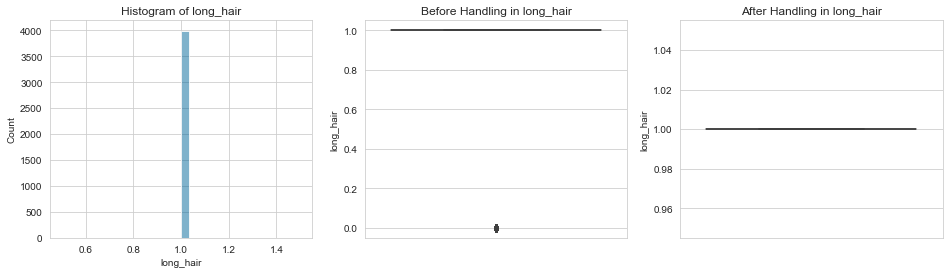

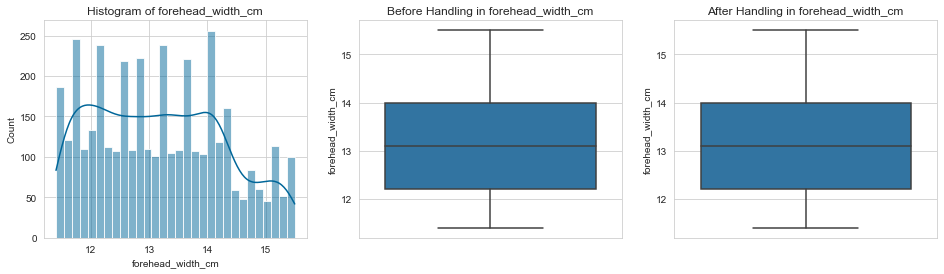

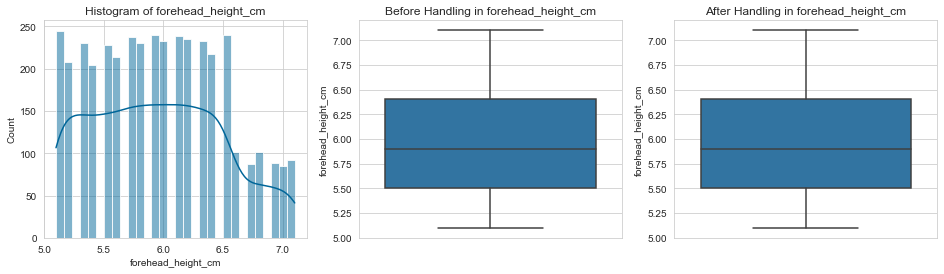

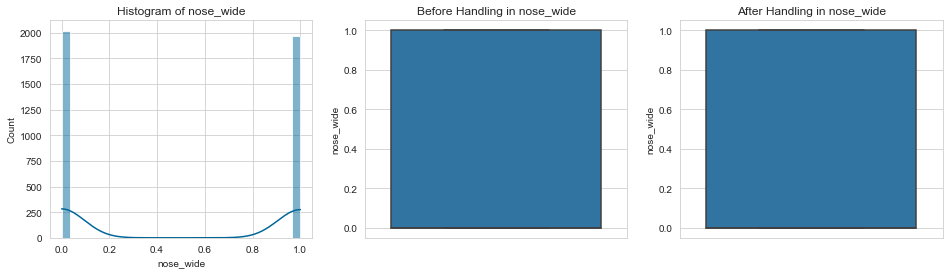

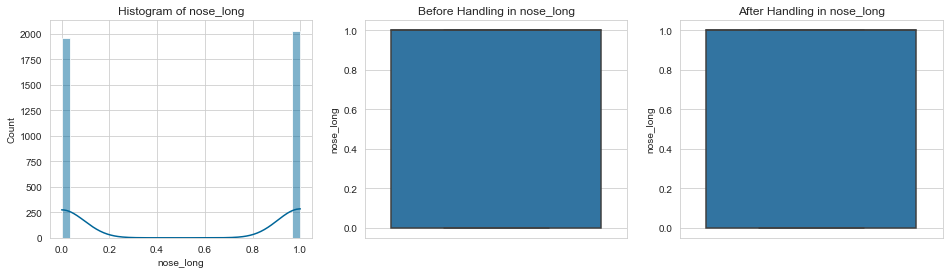

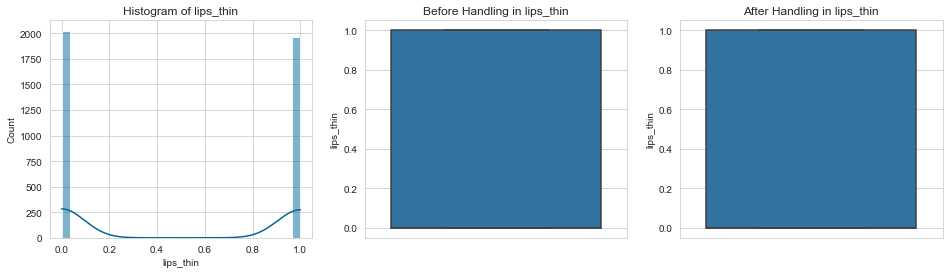

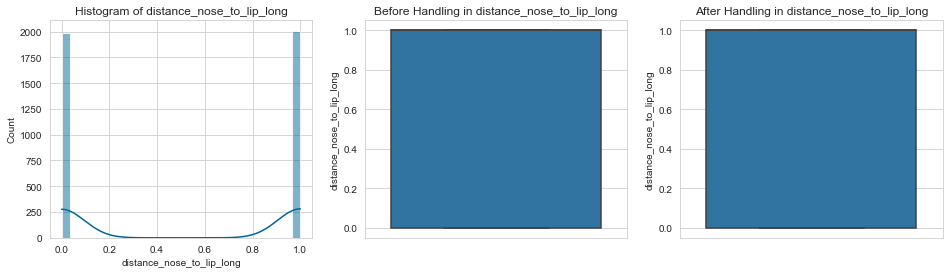

In [46]:
for i in X_train.describe().columns:
    diagnostic_plots(X_train, X_train_cap, i)

In [47]:
X_train_cap

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,width_limit,height_limit
4021,1.0,14.6,5.1,1,1,1,1,<= 15,<= 5.5
1121,1.0,12.1,5.4,0,0,0,0,<= 13,<= 5.5
999,1.0,13.4,5.4,1,0,0,0,<= 14,<= 5.5
3314,1.0,13.8,6.8,1,1,1,1,<= 14,<= 7
4467,1.0,14.6,6.0,1,1,1,0,<= 15,<= 6
...,...,...,...,...,...,...,...,...,...
1175,1.0,12.8,5.1,0,0,0,0,<= 13,<= 5.5
255,1.0,13.5,5.4,1,1,1,1,<= 14,<= 5.5
2934,1.0,13.7,6.0,0,0,1,0,<= 14,<= 6
2191,1.0,12.3,6.0,0,1,0,0,<= 13,<= 6


In [48]:
X_train_cap.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,3992.0,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000
mean,1.0,13.178858,5.951027,0.493737,0.508517,0.492485,0.503257
std,0.0,1.105239,0.542052,0.500023,0.499990,0.500006,0.500052
min,1.0,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.0,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.0,13.100000,5.900000,0.000000,1.000000,0.000000,1.000000
75%,1.0,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.0,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


##### Handling Missing Value

In [49]:
X_train_cap.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
width_limit                  0
height_limit                 0
dtype: int64

In [50]:
X_test.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
width_limit                  0
height_limit                 0
dtype: int64

### <strong>Model Definition<strong>

##### This section contains cells to define the model. Explain the reasons for using an algorithm/model, the hyperparameters used, the types of metrics used, and other things related to the model.
---

From this dataset i will make '6 Models',

* 'Logistics' : model for **Logistic Regression**
* 'SVC' : model for **Support Vector Classifier**
* 'Tree' : model for **Decision Tree**
* 'Forest' : model for **Random Forest**
* 'KNN' : model for **K*Nearest Neighbors**
* 'Naive' : model for **Naive Bayes**

and then the models will be tuned with 'GridSearchCSV'.

Dari Dataset ini akan dibuat '6 Model' sebagai berikut dan kemudian model akan di tuning menggunakan 'GridSearchCSV' :

* 'Logistic' :  model untuk **Logistic Regression**
* 'SVC'      :  model untuk **Support Vector Classifier**
* 'Tree'     :  model untuk **Decision Tree**
* 'Forest'   :  model untuk **Random Forest** 
* 'KNN'      :  model untuk **K*Nearest Neighbors**
* 'Naive'    :  model untuk **Naive Bayes**

##### Build Pipeline

In [51]:
num_columns = X_train_cap.select_dtypes(include = np.number).columns.tolist()
cat_columns = X_train_cap.select_dtypes(include = ['object']).columns.tolist()


In [52]:
X_train_cap

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,width_limit,height_limit
4021,1.0,14.6,5.1,1,1,1,1,<= 15,<= 5.5
1121,1.0,12.1,5.4,0,0,0,0,<= 13,<= 5.5
999,1.0,13.4,5.4,1,0,0,0,<= 14,<= 5.5
3314,1.0,13.8,6.8,1,1,1,1,<= 14,<= 7
4467,1.0,14.6,6.0,1,1,1,0,<= 15,<= 6
...,...,...,...,...,...,...,...,...,...
1175,1.0,12.8,5.1,0,0,0,0,<= 13,<= 5.5
255,1.0,13.5,5.4,1,1,1,1,<= 14,<= 5.5
2934,1.0,13.7,6.0,0,0,1,0,<= 14,<= 6
2191,1.0,12.3,6.0,0,1,0,0,<= 13,<= 6


In [53]:
num_pipe = Pipeline([
    ('scaling', MinMaxScaler())
])

cat_pipe =  Pipeline([
    ('encoded',OrdinalEncoder())
])

preprocess = ColumnTransformer([
    ('num',num_pipe,num_columns),
    ('cat',cat_pipe,cat_columns)
])

In [54]:
# Logistic Regression 
#log_reg = LogisticRegression(random_state=25)

# Support Vector Machine 
#svm_clf = SVC(random_state=25)

## Decision Tree
#tree_clf = DecisionTreeClassifier(max_depth=2, random_state=25)

## Random Forest
#forest_clf = RandomForestClassifier(max_depth=2, random_state=25) 

## KNN 
#knn_clf = KNeighborsClassifier(n_neighbors=25)

# Naive Bayes 
#naive_clf = GaussianNB()


In [55]:
pipe_logreg = Pipeline([
('preprocessing', preprocess ),
('pca',PCA(n_components=0.95)),
('classifier', LogisticRegression(random_state=25))])

pipe_svm = Pipeline([
('preprocessing', preprocess ),
('pca',PCA(n_components=0.95)),
('classifier', SVC(random_state=25))])

pipe_tree = Pipeline([
('preprocessing', preprocess ),
('pca',PCA(n_components=0.95)),
('classifier', DecisionTreeClassifier(random_state=25))])

pipe_ranfor = Pipeline([
('preprocessing', preprocess ),
('pca',PCA(n_components=0.95)),
('classifier', RandomForestClassifier(random_state=25))])

pipe_knn = Pipeline([
('preprocessing', preprocess ),
('pca',PCA(n_components=0.95)),
('classifier', KNeighborsClassifier(n_neighbors=25))])

pipe_naive = Pipeline([
('preprocessing', preprocess ),
('pca',PCA(n_components=0.95)),
('classifier', GaussianNB())])



In [56]:
comparison_tuned = pd.DataFrame(columns=[
    'Model',
    'f1_score_train',
    'f1_score_test',
    'recall_train',
    'recall_test'
])

### Model Training

##### This section contains only the code to train the model and the resulting output. Do the training process several times with different hyperparameters to see the results obtained. Analyze and narrate these results in the Model Evaluation section.
---

In [57]:
log_reg = pipe_logreg.fit(X_train_cap,y_train)

In [58]:
svm = pipe_svm.fit(X_train_cap,y_train)

In [59]:
tree = pipe_tree.fit(X_train_cap,y_train)

In [60]:
rf = pipe_ranfor.fit(X_train_cap,y_train)

In [61]:
knn = pipe_knn.fit(X_train_cap,y_train)

In [62]:
nb = pipe_naive.fit(X_train_cap,y_train)

### Model Evaluation

##### In this section, an evaluation of the model is carried out which must show how the model performs based on the selected metrics. This should be demonstrated by visualizing the performance trend and/or model error rate. Perform analysis related to the results on the model and write down the results of the analysis.
---

* Logistic Regression

In [63]:
y_pred_train_log_reg = log_reg.predict(X_train_cap)
y_pred_test_log_reg = log_reg.predict(X_test)

print(classification_report(y_train, y_pred_train_log_reg))
print(classification_report(y_test, y_pred_test_log_reg))

              precision    recall  f1-score   support

      Female       0.97      0.97      0.97      1991
        Male       0.97      0.97      0.97      2001

    accuracy                           0.97      3992
   macro avg       0.97      0.97      0.97      3992
weighted avg       0.97      0.97      0.97      3992

              precision    recall  f1-score   support

      Female       0.97      0.97      0.97       504
        Male       0.97      0.97      0.97       495

    accuracy                           0.97       999
   macro avg       0.97      0.97      0.97       999
weighted avg       0.97      0.97      0.97       999



* Support Vector Machine (SVM)

In [64]:
y_pred_train_svm = svm.predict(X_train_cap)
y_pred_test_svm = svm.predict(X_test)

print(classification_report(y_train, y_pred_train_svm))
print(classification_report(y_test, y_pred_test_svm))


              precision    recall  f1-score   support

      Female       0.97      0.98      0.97      1991
        Male       0.98      0.97      0.97      2001

    accuracy                           0.97      3992
   macro avg       0.97      0.97      0.97      3992
weighted avg       0.97      0.97      0.97      3992

              precision    recall  f1-score   support

      Female       0.97      0.97      0.97       504
        Male       0.97      0.97      0.97       495

    accuracy                           0.97       999
   macro avg       0.97      0.97      0.97       999
weighted avg       0.97      0.97      0.97       999



* Decision Tree

In [65]:
y_prediction_train_tree = tree.predict(X_train_cap)
y_prediction_test_tree = tree.predict(X_test)

print(classification_report(y_train, y_prediction_train_tree))
print(classification_report(y_test, y_prediction_test_tree))

              precision    recall  f1-score   support

      Female       1.00      1.00      1.00      1991
        Male       1.00      1.00      1.00      2001

    accuracy                           1.00      3992
   macro avg       1.00      1.00      1.00      3992
weighted avg       1.00      1.00      1.00      3992

              precision    recall  f1-score   support

      Female       0.96      0.97      0.97       504
        Male       0.97      0.96      0.97       495

    accuracy                           0.97       999
   macro avg       0.97      0.97      0.97       999
weighted avg       0.97      0.97      0.97       999



* Random Forest

In [66]:
y_pred_train_forest = rf.predict(X_train_cap)
y_pred_test_forest = rf.predict(X_test)

print(classification_report(y_train, y_pred_train_forest))
print(classification_report(y_test, y_pred_test_forest))

              precision    recall  f1-score   support

      Female       1.00      1.00      1.00      1991
        Male       1.00      1.00      1.00      2001

    accuracy                           1.00      3992
   macro avg       1.00      1.00      1.00      3992
weighted avg       1.00      1.00      1.00      3992

              precision    recall  f1-score   support

      Female       0.96      0.97      0.97       504
        Male       0.97      0.96      0.97       495

    accuracy                           0.97       999
   macro avg       0.97      0.97      0.97       999
weighted avg       0.97      0.97      0.97       999



* KNN // K-Neighbors

In [67]:
y_prediction_train_knn = knn.predict(X_train_cap)
y_prediction_test_knn = knn.predict(X_test)

print(classification_report(y_train, y_prediction_train_knn))
print(classification_report(y_test, y_prediction_test_knn))

              precision    recall  f1-score   support

      Female       0.96      0.98      0.97      1991
        Male       0.98      0.96      0.97      2001

    accuracy                           0.97      3992
   macro avg       0.97      0.97      0.97      3992
weighted avg       0.97      0.97      0.97      3992

              precision    recall  f1-score   support

      Female       0.96      0.97      0.97       504
        Male       0.97      0.96      0.96       495

    accuracy                           0.96       999
   macro avg       0.96      0.96      0.96       999
weighted avg       0.96      0.96      0.96       999



* Naive Bayes

In [68]:
y_pred_train_naive = nb.predict(X_train_cap)
y_pred_test_naive = nb.predict(X_test)

print(classification_report(y_train, y_pred_train_naive))
print(classification_report(y_test, y_pred_test_naive))

              precision    recall  f1-score   support

      Female       0.97      0.97      0.97      1991
        Male       0.97      0.97      0.97      2001

    accuracy                           0.97      3992
   macro avg       0.97      0.97      0.97      3992
weighted avg       0.97      0.97      0.97      3992

              precision    recall  f1-score   support

      Female       0.96      0.98      0.97       504
        Male       0.98      0.96      0.97       495

    accuracy                           0.97       999
   macro avg       0.97      0.97      0.97       999
weighted avg       0.97      0.97      0.97       999



### <strong>Hyperparameter Tuned GridSearch CV<strong>

---

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
parameters_logreg = { 'classifier__penalty': ['l1', 'l2','none'],
                  'classifier__C' : [0.001, 0.01, 0.1, 1],
                  'classifier__solver': ['liblinear', 'newton-cg', 'lbfgs']
                }

parameters_svm = {'classifier__kernel': ['rbf'],
                  'classifier__C' : [0.001, 0.01],
                  'classifier__gamma' : [0.001, 0.01],
                }

parameters_tree = {'classifier__criterion':['gini','entropy'],
              'classifier__max_depth':np.arange(2,8),
              'classifier__min_samples_split':np.arange(2,8),
              'classifier__min_samples_leaf':np.arange(2,8),
              'classifier__max_features':['auto','sqrt','log2']
              }

parameters_forest = {'classifier__criterion': ['gini','entropy'],
                  'classifier__max_depth':np.arange(2,8),
                  'classifier__max_features':['auto','sqrt','log2'],
                  'classifier__n_estimators' : [100,200,300] 
                   }

parameters_knn = {'classifier__n_neighbors' : [3,5,7],
              'classifier__weights': ['uniform','distance'],
                }


parameters_naive = {'classifier__priors': [None],
                  'classifier__var_smoothing' : [0.00000001, 0.000000001, 0.00000001]
                }

In [71]:
tuning_evaluation_metrics = pd.DataFrame(columns=['Model', 'f1-score(No, Train)', 'f1-score(Yes, Train)', 'f1-score(No, Test)', 'f1-score(Yes, Test)', 'recall(Yes, Train)', 'recall(Yes, Test)'])

* Logistic Regression

In [72]:
grid_log = GridSearchCV(pipe_logreg,parameters_logreg,cv = 5).fit(X_train_cap,y_train)

In [73]:
print('Training set score: ' + str(grid_log.score(X_train_cap, y_train)))
print('Test set score: ' + str(grid_log.score(X_test, y_test)))

Training set score: 0.9671843687374749
Test set score: 0.973973973973974


In [74]:
grid_log.best_params_

{'classifier__C': 0.001,
 'classifier__penalty': 'l1',
 'classifier__solver': 'liblinear'}

In [75]:
grid_log.best_score_

0.9676842293468338

In [76]:
log_reg_best = grid_log.best_estimator_
log_reg_best

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaling',
                                                                   MinMaxScaler())]),
                                                  ['long_hair',
                                                   'forehead_width_cm',
                                                   'forehead_height_cm',
                                                   'nose_wide', 'nose_long',
                                                   'lips_thin',
                                                   'distance_nose_to_lip_long']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoded',
                                                                   OrdinalEncoder())]),
                                                  [])])),
                ('pca', PCA(n_co

In [77]:
y_pred_train_tuning_logreg = log_reg_best.predict(X_train_cap)
y_pred_test_tuning_logreg = log_reg_best.predict(X_test)

print(classification_report(y_train, y_pred_train_tuning_logreg))
print(classification_report(y_test, y_pred_test_tuning_logreg))

              precision    recall  f1-score   support

      Female       0.97      0.97      0.97      1991
        Male       0.97      0.97      0.97      2001

    accuracy                           0.97      3992
   macro avg       0.97      0.97      0.97      3992
weighted avg       0.97      0.97      0.97      3992

              precision    recall  f1-score   support

      Female       0.97      0.98      0.97       504
        Male       0.98      0.97      0.97       495

    accuracy                           0.97       999
   macro avg       0.97      0.97      0.97       999
weighted avg       0.97      0.97      0.97       999



In [78]:
tuning_evaluation_metrics.loc[0] = ['logreg_tuned',0.97,0.97,0.97,0.97,0.97,0.97]

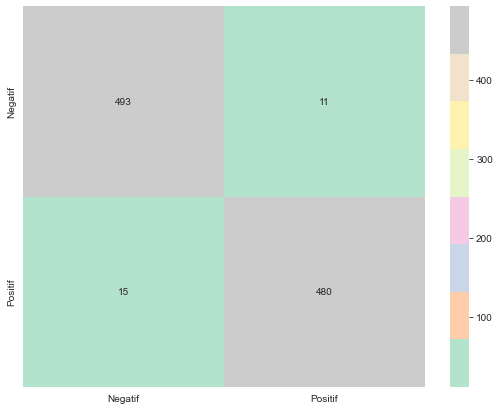

In [79]:
cf_matrix_log =  confusion_matrix(y_test,y_pred_test_tuning_logreg)

fig,ax = plt.subplots(figsize=(9,7))

ax = sns.heatmap(cf_matrix_log, annot=True, cmap='Pastel2', fmt='g')
ax.set_xticklabels(["Negatif", "Positif"])
ax.set_yticklabels(["Negatif", "Positif"])
plt.show()

* Support Vector Machine

In [80]:
grid_svm = GridSearchCV(pipe_svm,parameters_svm,cv = 5).fit(X_train_cap,y_train)

In [81]:
print('Training set score: ' + str(grid_svm.score(X_train_cap, y_train)))
print('Test set score: ' + str(grid_svm.score(X_test, y_test)))

Training set score: 0.7993486973947895
Test set score: 0.7777777777777778


In [82]:
grid_svm.best_params_

{'classifier__C': 0.01, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf'}

In [83]:
grid_svm.best_score_

0.6482962725963846

In [84]:
svm_best = grid_svm.best_estimator_
svm_best

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaling',
                                                                   MinMaxScaler())]),
                                                  ['long_hair',
                                                   'forehead_width_cm',
                                                   'forehead_height_cm',
                                                   'nose_wide', 'nose_long',
                                                   'lips_thin',
                                                   'distance_nose_to_lip_long']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoded',
                                                                   OrdinalEncoder())]),
                                                  [])])),
                ('pca', PCA(n_co

In [85]:
y_pred_train_tuning_svm = svm_best.predict(X_train_cap)
y_pred_test_tuning_svm = svm_best.predict(X_test)

print(classification_report(y_train, y_pred_train_tuning_svm))
print(classification_report(y_test, y_pred_test_tuning_svm))

              precision    recall  f1-score   support

      Female       1.00      0.60      0.75      1991
        Male       0.71      1.00      0.83      2001

    accuracy                           0.80      3992
   macro avg       0.86      0.80      0.79      3992
weighted avg       0.86      0.80      0.79      3992

              precision    recall  f1-score   support

      Female       1.00      0.56      0.72       504
        Male       0.69      1.00      0.82       495

    accuracy                           0.78       999
   macro avg       0.84      0.78      0.77       999
weighted avg       0.85      0.78      0.77       999



In [86]:
tuning_evaluation_metrics.loc[1] = ['svm_tuned',0.75,0.83,0.72,0.82,1.00,1.00]

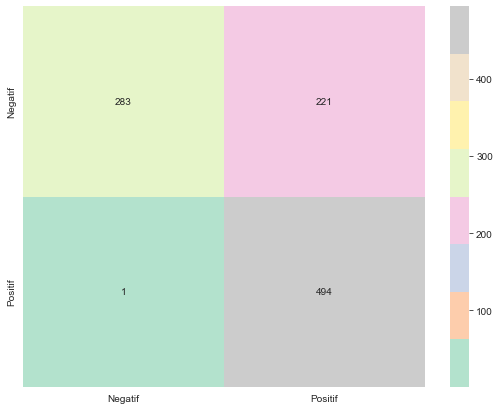

In [87]:
cf_matrix_svm =  confusion_matrix(y_test,y_pred_test_tuning_svm)

fig,ax = plt.subplots(figsize=(9,7))

ax = sns.heatmap(cf_matrix_svm, annot=True,cmap='Pastel2', fmt='g')
ax.set_xticklabels(["Negatif", "Positif"])
ax.set_yticklabels(["Negatif", "Positif"])
plt.show()

* Decision Tree

In [88]:
grid_tree = GridSearchCV(pipe_tree,parameters_tree,cv = 5).fit(X_train_cap,y_train)

In [89]:
print('Training set score: ' + str(grid_tree.score(X_train_cap, y_train)))
print('Test set score: ' + str(grid_tree.score(X_test, y_test)))

Training set score: 0.9734468937875751
Test set score: 0.974974974974975


In [90]:
grid_tree.best_params_

{'classifier__criterion': 'gini',
 'classifier__max_depth': 3,
 'classifier__max_features': 'auto',
 'classifier__min_samples_leaf': 2,
 'classifier__min_samples_split': 2}

In [91]:
grid_tree.best_score_

0.97244487940753

In [92]:
tree_best = grid_tree.best_estimator_
tree_best

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaling',
                                                                   MinMaxScaler())]),
                                                  ['long_hair',
                                                   'forehead_width_cm',
                                                   'forehead_height_cm',
                                                   'nose_wide', 'nose_long',
                                                   'lips_thin',
                                                   'distance_nose_to_lip_long']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoded',
                                                                   OrdinalEncoder())]),
                                                  [])])),
                ('pca', PCA(n_co

In [93]:
y_pred_train_tuning_tree = tree_best.predict(X_train_cap)
y_pred_test_tuning_tree = tree_best.predict(X_test)

print(classification_report(y_train, y_pred_train_tuning_tree))
print(classification_report(y_test, y_pred_test_tuning_tree))

              precision    recall  f1-score   support

      Female       0.97      0.98      0.97      1991
        Male       0.98      0.97      0.97      2001

    accuracy                           0.97      3992
   macro avg       0.97      0.97      0.97      3992
weighted avg       0.97      0.97      0.97      3992

              precision    recall  f1-score   support

      Female       0.97      0.98      0.98       504
        Male       0.98      0.97      0.97       495

    accuracy                           0.97       999
   macro avg       0.98      0.97      0.97       999
weighted avg       0.98      0.97      0.97       999



In [94]:
tuning_evaluation_metrics.loc[2] = ['tree_tuned',0.97,0.97,0.98,0.97,0.97,0.97]

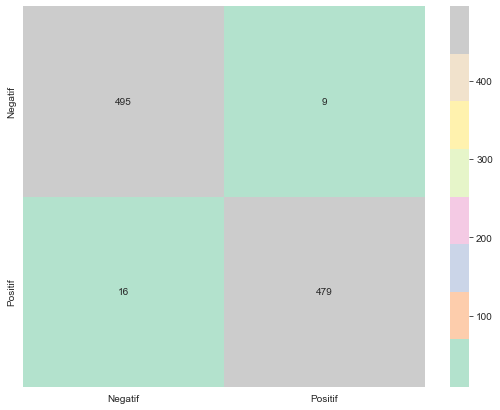

In [95]:
cf_matrix_tree =  confusion_matrix(y_test,y_pred_test_tuning_tree)

fig,ax = plt.subplots(figsize=(9,7))

ax = sns.heatmap(cf_matrix_tree, annot=True,cmap='Pastel2', fmt='g')
ax.set_xticklabels(["Negatif", "Positif"])
ax.set_yticklabels(["Negatif", "Positif"])
plt.show()

* Random Forest

In [96]:
grid_rf = GridSearchCV(pipe_ranfor,parameters_forest,cv = 5).fit(X_train_cap,y_train)

In [97]:
print('Training set score: ' + str(grid_rf.score(X_train_cap, y_train)))
print('Test set score: ' + str(grid_rf.score(X_test, y_test)))

Training set score: 0.9754509018036072
Test set score: 0.970970970970971


In [98]:
grid_rf.best_params_

{'classifier__criterion': 'gini',
 'classifier__max_depth': 4,
 'classifier__max_features': 'auto',
 'classifier__n_estimators': 200}

In [99]:
grid_rf.best_score_

0.9736964438630995

In [100]:
forest_best = grid_rf.best_estimator_
forest_best

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaling',
                                                                   MinMaxScaler())]),
                                                  ['long_hair',
                                                   'forehead_width_cm',
                                                   'forehead_height_cm',
                                                   'nose_wide', 'nose_long',
                                                   'lips_thin',
                                                   'distance_nose_to_lip_long']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoded',
                                                                   OrdinalEncoder())]),
                                                  [])])),
                ('pca', PCA(n_co

In [101]:
y_pred_train_tuning_forest = forest_best.predict(X_train_cap)
y_pred_test_tuning_forest = forest_best.predict(X_test)

print(classification_report(y_train, y_pred_train_tuning_forest))
print(classification_report(y_test, y_pred_test_tuning_forest))

              precision    recall  f1-score   support

      Female       0.97      0.98      0.98      1991
        Male       0.98      0.97      0.98      2001

    accuracy                           0.98      3992
   macro avg       0.98      0.98      0.98      3992
weighted avg       0.98      0.98      0.98      3992

              precision    recall  f1-score   support

      Female       0.96      0.98      0.97       504
        Male       0.98      0.96      0.97       495

    accuracy                           0.97       999
   macro avg       0.97      0.97      0.97       999
weighted avg       0.97      0.97      0.97       999



In [102]:
tuning_evaluation_metrics.loc[3] = ['forest_tuned',0.98,0.98,0.97,0.97,0.97,0.96]

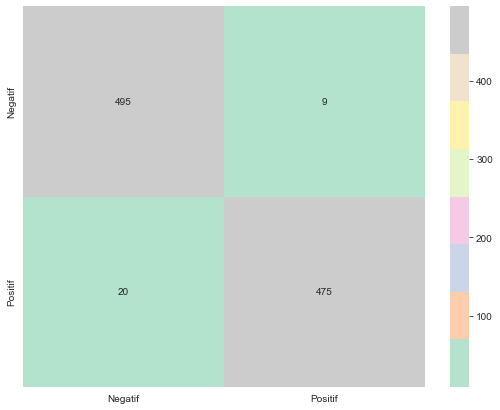

In [103]:
cf_matrix_forest =  confusion_matrix(y_test,y_pred_test_tuning_forest)

fig,ax = plt.subplots(figsize=(9,7))

ax = sns.heatmap(cf_matrix_forest, annot=True,cmap='Pastel2', fmt='g')
ax.set_xticklabels(["Negatif", "Positif"])
ax.set_yticklabels(["Negatif", "Positif"])
plt.show()

* KNN / K-Neighbors

In [104]:
grid_knn = GridSearchCV(pipe_knn,parameters_knn,cv = 5).fit(X_train_cap,y_train)

In [105]:
print('Training set score: ' + str(grid_knn.score(X_train_cap, y_train)))
print('Test set score: ' + str(grid_knn.score(X_test, y_test)))

Training set score: 0.9741983967935872
Test set score: 0.968968968968969


In [106]:
grid_knn.best_params_

{'classifier__n_neighbors': 7, 'classifier__weights': 'uniform'}

In [107]:
grid_knn.best_score_

0.9669336043487944

In [108]:
knn_best = grid_knn.best_estimator_
knn_best

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaling',
                                                                   MinMaxScaler())]),
                                                  ['long_hair',
                                                   'forehead_width_cm',
                                                   'forehead_height_cm',
                                                   'nose_wide', 'nose_long',
                                                   'lips_thin',
                                                   'distance_nose_to_lip_long']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoded',
                                                                   OrdinalEncoder())]),
                                                  [])])),
                ('pca', PCA(n_co

In [109]:
y_pred_train_tuning_knn = knn_best.predict(X_train_cap)
y_pred_test_tuning_knn = knn_best.predict(X_test)

print(classification_report(y_train, y_pred_train_tuning_knn))
print(classification_report(y_test, y_pred_test_tuning_knn))

              precision    recall  f1-score   support

      Female       0.97      0.98      0.97      1991
        Male       0.98      0.97      0.97      2001

    accuracy                           0.97      3992
   macro avg       0.97      0.97      0.97      3992
weighted avg       0.97      0.97      0.97      3992

              precision    recall  f1-score   support

      Female       0.96      0.98      0.97       504
        Male       0.98      0.96      0.97       495

    accuracy                           0.97       999
   macro avg       0.97      0.97      0.97       999
weighted avg       0.97      0.97      0.97       999



In [110]:
tuning_evaluation_metrics.loc[4] = ['knn_tuned',0.97,0.97,0.97,0.97,0.97,0.96]

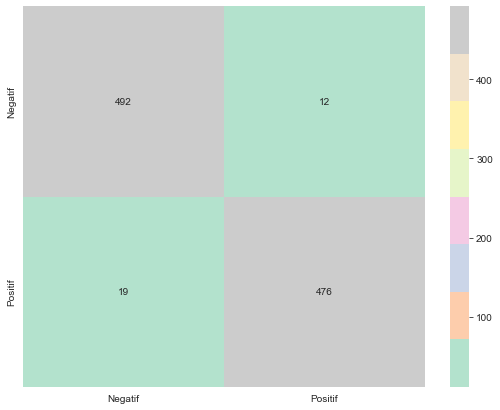

In [111]:
cf_matrix_knn =  confusion_matrix(y_test,y_pred_test_tuning_knn)

fig,ax = plt.subplots(figsize=(9,7))

ax = sns.heatmap(cf_matrix_knn, annot=True,cmap='Pastel2', fmt='g')
ax.set_xticklabels(["Negatif", "Positif"])
ax.set_yticklabels(["Negatif", "Positif"])
plt.show()

* Naive Bayes

In [112]:
grid_nb = GridSearchCV(pipe_naive,parameters_naive,cv = 5).fit(X_train_cap,y_train)

In [113]:
print('Training set score: ' + str(grid_nb.score(X_train_cap, y_train)))
print('Test set score: ' + str(grid_nb.score(X_test, y_test)))

Training set score: 0.968687374749499
Test set score: 0.972972972972973


In [114]:
grid_nb.best_params_

{'classifier__priors': None, 'classifier__var_smoothing': 1e-08}

In [115]:
grid_nb.best_score_

0.96968892820286

In [116]:
naive_best = grid_nb.best_estimator_
naive_best

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaling',
                                                                   MinMaxScaler())]),
                                                  ['long_hair',
                                                   'forehead_width_cm',
                                                   'forehead_height_cm',
                                                   'nose_wide', 'nose_long',
                                                   'lips_thin',
                                                   'distance_nose_to_lip_long']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoded',
                                                                   OrdinalEncoder())]),
                                                  [])])),
                ('pca', PCA(n_co

In [117]:
y_pred_train_tuning_naive = naive_best.predict(X_train_cap)
y_pred_test_tuning_naive = naive_best.predict(X_test)

print(classification_report(y_train, y_pred_train_naive))
print(classification_report(y_test, y_pred_test_tuning_naive))

              precision    recall  f1-score   support

      Female       0.97      0.97      0.97      1991
        Male       0.97      0.97      0.97      2001

    accuracy                           0.97      3992
   macro avg       0.97      0.97      0.97      3992
weighted avg       0.97      0.97      0.97      3992

              precision    recall  f1-score   support

      Female       0.96      0.98      0.97       504
        Male       0.98      0.96      0.97       495

    accuracy                           0.97       999
   macro avg       0.97      0.97      0.97       999
weighted avg       0.97      0.97      0.97       999



In [118]:
tuning_evaluation_metrics.loc[5] = ['naive_tuned',0.97,0.97,0.97,0.97,0.97,0.96]

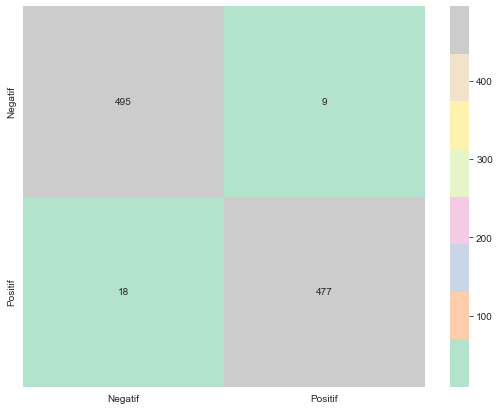

In [119]:
cf_matrix_naive =  confusion_matrix(y_test,y_pred_test_tuning_naive)

fig,ax = plt.subplots(figsize=(9,7))

ax = sns.heatmap(cf_matrix_naive, annot=True,cmap='Pastel2', fmt='g')
ax.set_xticklabels(["Negatif", "Positif"])
ax.set_yticklabels(["Negatif", "Positif"])
plt.show()

In [120]:
tuning_evaluation_metrics

,Model,"f1-score(No, Train)","f1-score(Yes, Train)","f1-score(No, Test)","f1-score(Yes, Test)","recall(Yes, Train)","recall(Yes, Test)"
0,logreg_tuned,0.97,0.97,0.97,0.97,0.97,0.97
1,svm_tuned,0.75,0.83,0.72,0.82,1.00,1.00
2,tree_tuned,0.97,0.97,0.98,0.97,0.97,0.97
3,forest_tuned,0.98,0.98,0.97,0.97,0.97,0.96
4,knn_tuned,0.97,0.97,0.97,0.97,0.97,0.96
5,naive_tuned,0.97,0.97,0.97,0.97,0.97,0.96


From this dataset i will make '6 Models',

* 'Logistics' : model for **Logistic Regression**
* 'SVC' : model for **Support Vector Classifier**
* 'Tree' : model for **Decision Tree**
* 'Forest' : model for **Random Forest**
* 'KNN' : model for **K*Nearest Neighbors**
* 'Naive' : model for **Naive Bayes**

and then the models will be tuned with 'GridSearchCSV'.

<h3>*Notes:


- I choose the model based on my consideration of the 'recall' value. After conducting a model evaluation, the results of the 'svm' model produce a high recall value, both train and test are 100%, but i'm worry about data leakage if the value of the model is 100%, yes perfect. because the dataset I'm using doesn't occur in real cases, so I think it's not a problem.

- The 'svm' model is also able to detect the value of TP (True Positive) so the model places a positive label in a positive group, the 'svm' model only 1 incorrectly groups it into FN (False Negative) where maybe this gender already has features according to features but isn't detected whether male or female. but, once again it's not a problem because this doesn't happen in real cases.

- Then I also consider that the 'logistic regression' model produces train and test values ​​at 'f1-score' and 'recall' which are quite stable at 97% and the 'random forest' model produces 98% train values ​​and the test is 97% not too many decreases. however, these two models are more likely to misclassify the target that should have been in accordance with the features but not detected by the model and become FN (False Negative) so i didn't know whether the gender is 'male' / 'female'. but not a consideration for me because this doesn't happen in real cases.</h3>

*Note: 
- Saya akan memilih model berdasarkan pertimbangan nilai 'recall'. Setelah melakukan model evaluation hasilnya model 'svm' menghasilkan nilai recall yang tinggi baik train dan test nya 100% namun mungkin di khawatirkan adanya kebocoran data apabila nilai dari model 100%. karena dataset yang saya gunakan bukan terjadi atas kasus nyata, menurut saya tidak masalah. 

- Model 'svm' juga mampu mendeteksi nilai TP (True Positive) jadi model menempatkan label positif dalam kelompok positif, model 'svm' hanya 1 salah mengelompokan jadi FN (False Negatif) dimana mungkin gender ini sudah memiliki ciri ciri sesuai fitur namun tidak terdeksi apakah pria atau wanita. tapi tidak terlalu menjadi pertimbangan karena ini bukan terjadi pada kasus nyata. 

- Kemudian saya juga mempertimbangkan bahwa model 'logistic regression' menghasilkan nilai train dan test pada'f1-score' dan 'recall' yang cukup stabil yaitu 97% dan model 'random forest' menghasilkan nilai train 98% dan test nya 97% tidak terjadi penuruan yang jauh. namun kedua model ini lebih banyak salah mengelompokan target yang seharusnya mungkin sudah sesuai feature namun tidak terdeteksi oleh model dan menjadi FN (False Negative) jadi tidak diketahui apakah gender nya masuk kategori pria / wanita. namun kembali lagi tidak menjadi pertimbangan karena ini bukan terjadi pada kasus nyata. 

##### Save pkl file

In [121]:
with open("pipe.pkl", "wb") as a:
    pickle.dump(svm_best, a)

### Model Inference

##### The model that has been trained will be tested on data that is not included in the train-set or test-set. This data must be in the original format, not scaled data.
---

In [122]:
column = X_train_cap.columns

df_inf = df_inf[column]

df_inf.reset_index(drop=True,inplace=True)

df_inf

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,width_limit,height_limit
0,1,13.4,5.7,0,0,0,0,<= 14,<= 6
1,1,14.2,5.7,0,1,0,1,<= 15,<= 6
2,1,13.2,7.1,0,1,1,0,<= 14,<= 7.5
3,1,12.5,5.6,0,0,0,0,<= 13,<= 6
4,1,14.5,6.6,1,1,0,1,<= 15,<= 7
5,1,14.3,5.3,0,0,0,1,<= 15,<= 5.5
6,1,12.5,6.2,0,0,0,0,<= 13,<= 6.5
7,1,13.9,6.2,0,0,1,1,<= 14,<= 6.5
8,1,14.7,7.0,0,0,1,1,<= 15,<= 7
9,1,13.7,6.9,1,1,1,1,<= 14,<= 7


In [123]:
#load file pkl

with open("pipe.pkl", "rb") as a:
    pipeline = pickle.load(a)

In [124]:
# Prediksi menggunakan model svm dengan parameter terbaik

y_pred_inf = pipeline.predict(df_inf)
y_pred_inf = pd.DataFrame(y_pred_inf, columns=['Gender Prediction'])
y_pred_inf

,Gender Prediction
0,Female
1,Male
2,Male
3,Female
4,Male
5,Male
6,Female
7,Male
8,Male
9,Male


In [125]:
# Menggabungkan prediksi dengan data_inf
data_akhir = pd.concat([df_inf, y_pred_inf], axis=1)

In [126]:
data_akhir

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,width_limit,height_limit,Gender Prediction
0,1,13.4,5.7,0,0,0,0,<= 14,<= 6,Female
1,1,14.2,5.7,0,1,0,1,<= 15,<= 6,Male
2,1,13.2,7.1,0,1,1,0,<= 14,<= 7.5,Male
3,1,12.5,5.6,0,0,0,0,<= 13,<= 6,Female
4,1,14.5,6.6,1,1,0,1,<= 15,<= 7,Male
5,1,14.3,5.3,0,0,0,1,<= 15,<= 5.5,Male
6,1,12.5,6.2,0,0,0,0,<= 13,<= 6.5,Female
7,1,13.9,6.2,0,0,1,1,<= 14,<= 6.5,Male
8,1,14.7,7.0,0,0,1,1,<= 15,<= 7,Male
9,1,13.7,6.9,1,1,1,1,<= 14,<= 7,Male


### Conclusion
---

<h4>

**<ins>Assumption from EDA:<ins>**

- There are 2 genders in this dataset, called (**'Male'**) and (**'Female'**). frequency between 'Male' and 'Female' almost balanced. 
the difference by the number of male and female isn't too significant.

- In my opinion, the first physical characteristic that may have an effect / very visible is in terms of hair. So i've analysis, both of sexes **'male'** and **'female'** are equally more likely to have long hair than short hair, but a slight increase in the percentage for female.

- The second in my opinion, if we look based on 'nose_wide' or the width of the nose, on the chart above we can see that there are more physical characteristics of 'nose wide' than 'narrrow noses'. So the physical characteristics of the nose shape, by looking at the width of the nose, the percentage of **Male** tends to be higher than **Female**. meaning that **FEMALE** tend to have narrow noses than wide noses, while **MALE** mostly have wide noses.

- Then for the physical characteristics of the nose shape, 'nose wide' and 'nose long'. based on 'nose_long', On the chart above we can see that there have physical characteristics, **Female** have short noses more than long noses, but most of **Male** have long noses.

- There are also physical characteristics seen from the shape of the forehead, if we look at the forehead width / 'forehead_width' it is from 11cm to 16 and the forehead height / 'forehead_height' is from 5cm to 7.5 cm. So it can be concluded that if the forehead height is above 6.5 cm and the forehead width is more than 15 cm then the gender must be 'Male' or male, otherwise the female gender should be more than the male.

- The last form of physical characteristic is lips, the dataset is written as 'lipsthin' - This column contains 0 and 1 where 1 represents "thin lips" while 0 is "not thin lips". As we can see from chart above the physical characteristics of gender by the size of lips, most OF **FEMALE** have thin lips than **MALE**, most of male have thick lips.</h4>

<h4>

**<ins>Assumption from MODELS:<ins>**

For this project, i tried to make '6 Models';

* 'Logistics' : model for **Logistic Regression**
* 'SVC' : model for **Support Vector Classifier**
* 'Tree' : model for **Decision Tree**
* 'Forest' : model for **Random Forest**
* 'KNN' : model for **K*Nearest Neighbors**
* 'Naive' : model for **Naive Bayes**

and then the models are tuned with Hyperparameter 'GridSearchCSV'.

- I choose the model based on my consideration of the 'recall' value. After conducting a model evaluation, the results of the 'svm' model produce a high recall value, both train and test are 100%, but i'm worry about data leakage if the value of the model is 100%, yes perfect. because the dataset I'm using doesn't occur in real cases, so I think it's not a problem.

- The 'svm' model is also able to detect the value of TP (True Positive) so the model places a positive label in a positive group, the 'svm' model only 1 incorrectly groups it into FN (False Negative) where maybe this gender already has features according to features but isn't detected whether male or female. but, once again it's not a problem because this doesn't happen in real cases.

- Then I also consider that the 'logistic regression' model produces train and test values ​​at 'f1-score' and 'recall' which are quite stable at 97% and the 'random forest' model produces 98% train values ​​and the test is 97% not too many decreases. however, these two models are more likely to misclassify the target that should have been in accordance with the features but not detected by the model and become FN (False Negative) so i didn't know whether the gender is 'male' / 'female'. but not a consideration for me because this doesn't happen in real cases.</h4>

<h4>I made this project with deployment in herokuapp, kindly check my dashboard:</h4>

[![Deploy to Heroku](https://www.herokucdn.com/deploy/button.svg)](https://anita-009.herokuapp.com/)

<h3>Successful prediction from gender classification can improve the performance of many applications, but I assume that if the feature only consists of a few columns and the information in this dataset isn't very accurated. then it's not certain the the model can predict accurate results. due to lack of other information as a feature. 


Those are the conclusions that I wrote from the results of the Milestone 2 project, Thank you!</h3>

Pada tugas Milestone 2 ini saya memilih project classification model, dan dataset yang saya gunakan adalah dataset dari kaggle tentang data 'classification gender' berikut asumsi saya tentang project yang saya lakukan: 

Sebuah sistem klasifikasi gender menggunakan feature dari ciri ciri fisik seseorang, contoh dari 'long_hair' atau panjang rambut, 'forehead_width', 'forehead_height' (lebar dan tinggi dahi), 'nose_wide','nose_long' (lebar dan panjang hidung) , (ukuran bibir) 'lip_thin', 
'distance_nose_to_lip_long' (jarak hidung ke bibir), atau mungkin dapat dengan ciri fisik lainnya yang di infokan namun pada dataset yang saya gunakan hanya terdapat 7 feature yang diberikan untuk memprediksi (jenis kelamin) /'gender' dari orang berciri ciri tersebut.

Data visualisai dari EDA yang saya lakukan:
- Pada dataset ini terdapat 2 gender, yaitu **PRIA** ('male') dan **WANITA** ('female'). 50% nya atau 2500 orang adalah ber-jenis kelamin wanita, 50% lagi adalah ber-jenis kelamin pria sebanyak 2501 orang. perbedaan jumlah pria dan wanita tidak terlalu significant.

- Menurut saya, ciri fisik pertama yang kemungkinan berpengaruh / terlihat sekali adalah dari segi rambut. Jadi saya melihat berdasarkan 'long_hair' atau panjang rambut, pada dataset tertulis keterangan dimana 0 adalah 'rambut pendek' dan 1 adalah 'rambut panjang'. Analisa saya, kedua jenis kelamin ini 'male' dan 'female' sama sama lebih banyak berambut panjang dibandingkan berambut pendek, namun sedikit peningkatan persentase untuk wanita.

- Yang kedua menurut saya, jika kita lihat berdasarkan 'nose_wide' atau lebarnya hidung, pada dataset ditulis keterangan bahwa 0 adalah 'hidung tidak lebar' dan 1 adalah 'hidung lebar. pada chart bisa kita lihat ciri fisik 'hidung tidak lebar' lebih banyak daripada 'hidung lebar'. Jadi ciri fisik dari bentuk hidung, dengan melihat lebar hidung persentase dari pria cenderung lebih tinggi dibanding wanita. artinya wanita cenderung memiliki hidung yang lebih sempit daripada hidung lebar, sedangkan pria sebagian besar memiliki hidung lebar.

- Kemudian untuk ciri fisik dari bentuk hidung, 'nose wide' dan 'nose long', Jika kita lihat berdasarkan 'nose_wide' atau lebarnya hidung, pada dataset ditulis keterangan bahwa 0 adalah 'hidung tidak lebar' dan 1 adalah 'hidung lebar. pada chart bisa kita lihat ciri fisik 'hidung tidak lebar' lebih banyak daripada 'hidung lebar'. dan berdasarkan 'nose_long' atau panjang hidung, pada dataset ditulis keterangan bahwa 0 adalah 'hidung tidak panjang' dan 1 adalah 'hidung panjang'. pada chart bisa kita lihat ciri fisik 'hidung tidak panjang' lebih sedikit daripada 'hidung panjang'.
Jika dilihat ciri fisik dari bentuk hidung, dengan melihat lebar hidung persentase dari pria cenderung lebih tinggi dibanding wanita. 
Jika dilihat dari ciri fisik, dengan mengukur panjang hidung persentase dari gender pria lebih tinggi dibandingkan dengan gender wanita 'female'.
Kesimpulan yang saya ambil, wanita memiliki hidung yang lebih sempit daripada hidung yang lebar, tetapi sebagian besar pria memiliki hidung yang lebar. dan juga wanita memiliki hidung yang lebih pendek daripada hidung yang panjang, tetapi sebagian besar pria memiliki hidung yang panjang.

- Terdapat juga ciri fisik dilihat dari bentuk dahi, Keterangan pada dataset lebar dahi - Kolom ini ada di CM. Ini adalah lebar dahi.
tinggi dahi - Ini adalah tinggi dahi dan dalam Cm.
Jika kita lihat lebar dahi / 'forehead_width' ini dari 11cm sampai dengan 16 dan tinggi dahi / 'forehead_height' ini dari 5cm sampai dengan 7,5 cm. Maka dapat disimpulkan bahwa jika tinggi dahi diatas 6,5 cm dan lebar dahi lebih dari 15cm maka jenis kelaminnya pasti 'Male' atau pria, jika tidak maka seharusnya jenis kelamin wanita lebih banyak dibandingkan dengan pria.

- Bentuk ciri fisik yang terakhir adalah bibir, pada dataset ditulis keterangan bahwa 'lipsthin' - Kolom ini berisi 0 dan 1 di mana 1 mewakili "bibir tipis" sedangkan 0 adalah "Bibir tidak tipis". Jika dilihat dari ciri fisik berdasarkan bibir, bentuk tipis bibir tipis lebih banyak di miliki oleh yang ber jenis kelamin 'female' atau wanita. jika dibandingan dengan jenis kelamin pria. Maka dapat saya simpulkan bahwa sebagian besar ciri fisik wanita memiliki bibir yang tipis, namun sebagian besar pria memiliki bibir yang tebal.

Kesimpulan model:
- Saya akan memilih model berdasarkan pertimbangan nilai 'recall'. Setelah melakukan model evaluation hasilnya model 'svm' menghasilkan nilai recall yang tinggi baik train dan test nya 100% namun mungkin di khawatirkan adanya kebocoran data apabila nilai dari model 100%. karena dataset yang saya gunakan bukan terjadi atas kasus nyata, menurut saya tidak masalah. 

- Model 'svm' juga mampu mendeteksi nilai TP (True Positive) jadi model menempatkan label positif dalam kelompok positif, model 'svm' hanya 1 salah mengelompokan jadi FN (False Negatif) dimana mungkin gender ini sudah memiliki ciri ciri sesuai fitur namun tidak terdeksi apakah pria atau wanita. tapi tidak terlalu menjadi pertimbangan karena ini bukan terjadi pada kasus nyata. 

- Kemudian saya juga mempertimbangkan bahwa model 'logistic regression' menghasilkan nilai train dan test pada'f1-score' dan 'recall' yang cukup stabil yaitu 97% dan model 'random forest' menghasilkan nilai train 98% dan test nya 97% tidak terjadi penuruan yang jauh. namun kedua model ini lebih banyak salah mengelompokan target yang seharusnya mungkin sudah sesuai feature namun tidak terdeteksi oleh model dan menjadi FN (False Negative) jadi tidak diketahui apakah gender nya masuk kategori pria / wanita. namun kembali lagi tidak menjadi pertimbangan karena ini bukan terjadi pada kasus nyata. 

Prediksi klasifikasi gender yang berhasil dapat meningkatkan kinerja banyak aplikasi, namun saya sendiri berasumsi bahwa jika feature hanya terdiri dari beberapa kolom dan informasi tidak begitu jelas, maka tidak bisa dipastikan bawa model dapat memprediksi hasil yang akurat. karena kurangnya informasi lain sebagai feature. 

Sekian kesimpulan yang saya ambil dari hasil tugas Milestone 2 phase 1, Terima kasih